In [67]:
##############################################
######## OLD CODE ############################
##############################################


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import minimize

def simulate_complex_recursion_old(N, t1, t2, c, num_iterations):
    
    c = np.asarray(c) #cost function initialize

    # Initial states 1/sqrt(N)
    x = np.full(N, 1/np.sqrt(N), dtype=np.complex128)

  
    
    
    # Store iterations
    history = np.zeros((num_iterations, N), dtype=np.complex128)
    cost=np.zeros(num_iterations)
    mean_history = np.zeros(num_iterations, dtype=np.complex128)


    for n in range(num_iterations):
        exp_ib_pi2 = np.exp(1j * (t2[n] + np.pi) / 2)
        sin_b2 = np.sin(t2[n] / 2)
        history[n] = x  # Store current state
        mean_history[n] = np.mean(x) 
        # Compute the sum term
        sum_term = np.sum(x * np.exp(1j * t1[n] * c)) / N
        
        # Update x_i for all i
        x = x * np.exp(1j * t1[n] * c) + 2 * exp_ib_pi2 * sin_b2 * sum_term
        cost[n]=np.dot(np.abs(x)**2,c)
    return history,mean_history,cost



def plot_evolution(history,mean_history,c):
    """
    Plots the evolution of the N complex variables on the complex plane.
    
    Parameters:
    history (ndarray): Array of shape (num_iterations, N) containing the evolution of x_i.
    """
    scale=np.max(np.abs(history))
    num_iterations, N = history.shape
    cmap = cm.viridis  # Use the viridis colormap for coloring points based on c values
    plt.figure(figsize=(8, 8))
    for n in range(num_iterations):
        plt.clf()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.scatter(history[n].real, history[n].imag, c=c, cmap=cmap, edgecolors='k')
        plt.scatter(mean_history[n].real, mean_history[n].imag, color='red', marker='x', s=100, label='Mean x')
        plt.xlim(-scale, scale)
        plt.ylim(-scale, scale)
        plt.xlabel('Real')
        plt.ylabel('Imaginary')
        plt.title(f'Step {n + 1}/{num_iterations}')
        plt.pause(0.1)  # Pause to visualize step-by-step
    plt.show()



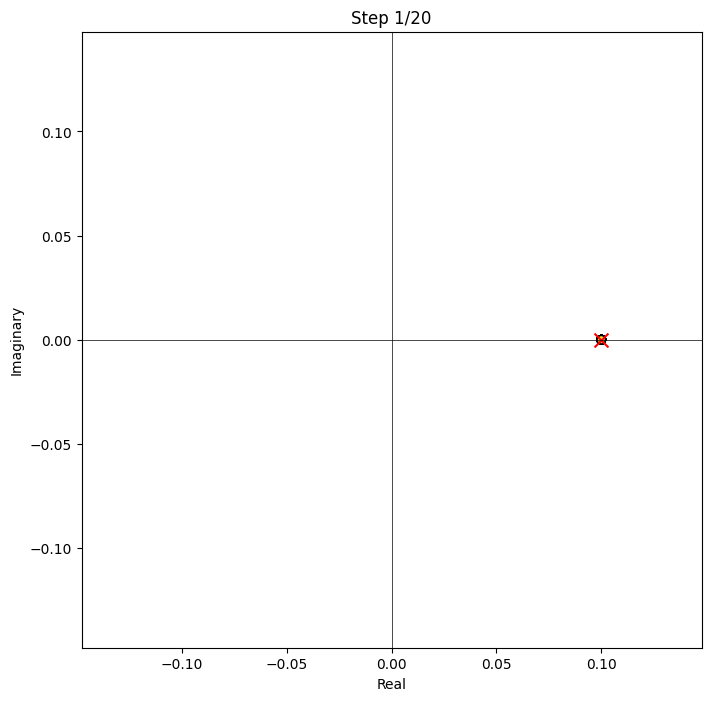

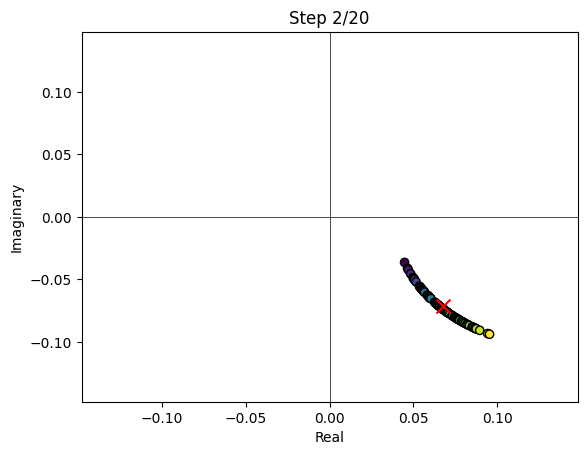

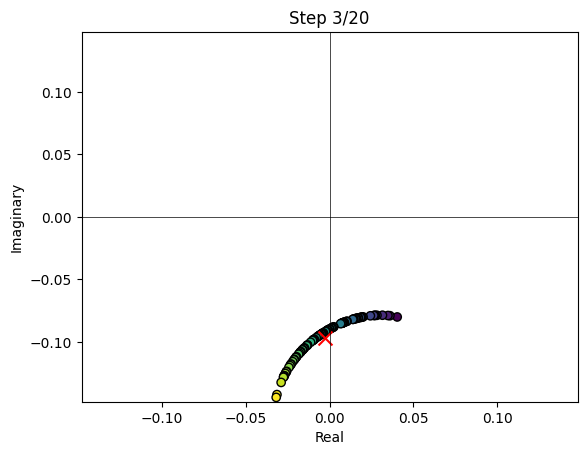

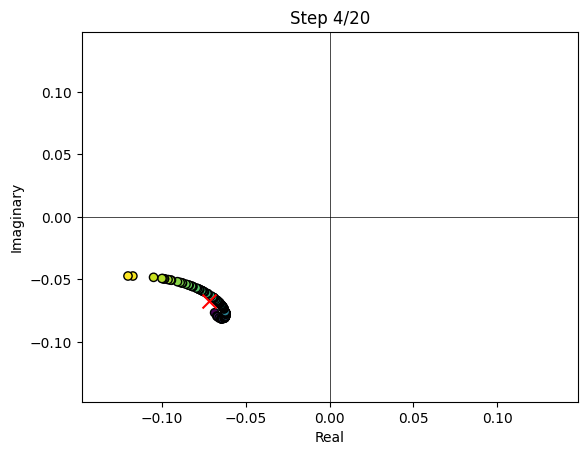

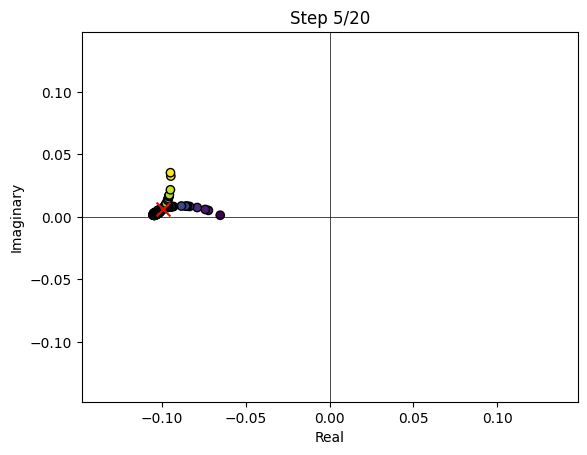

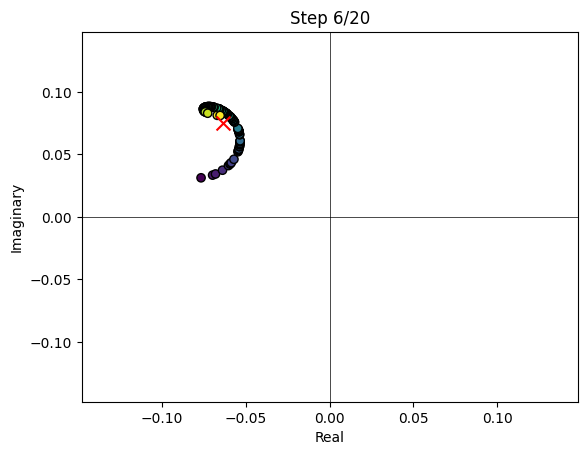

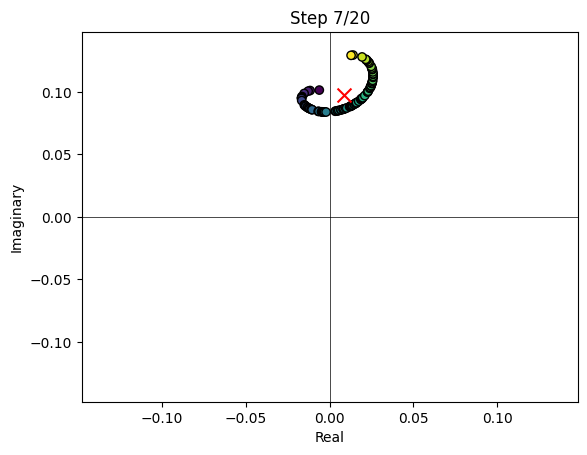

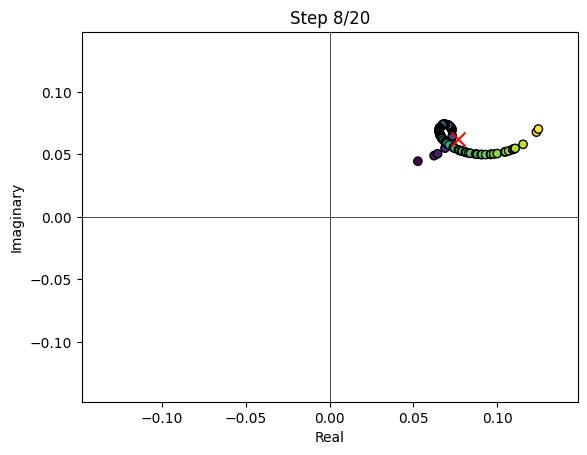

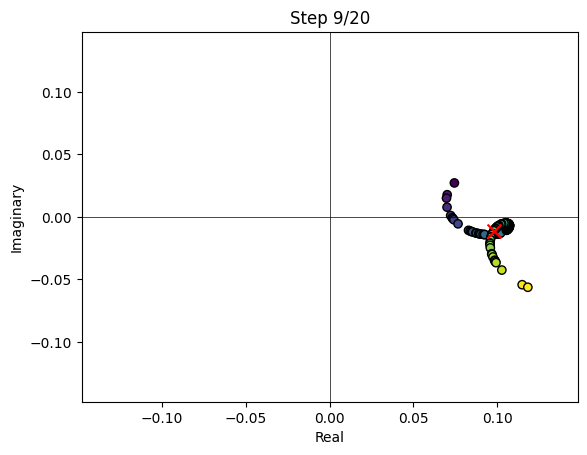

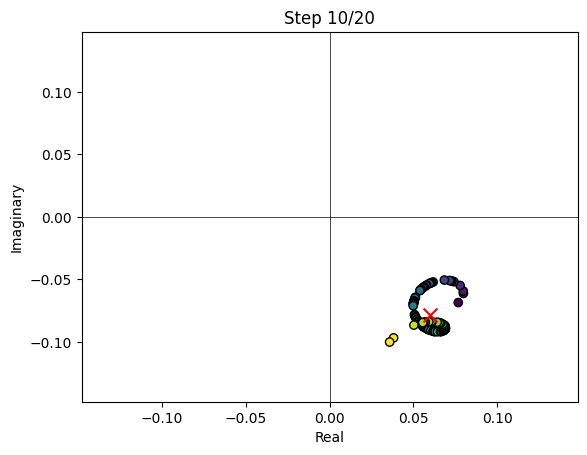

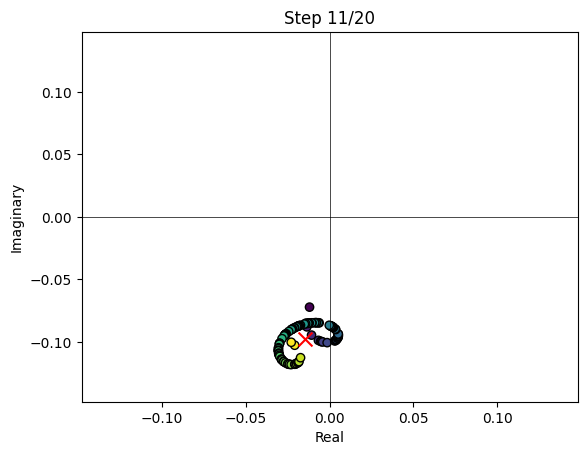

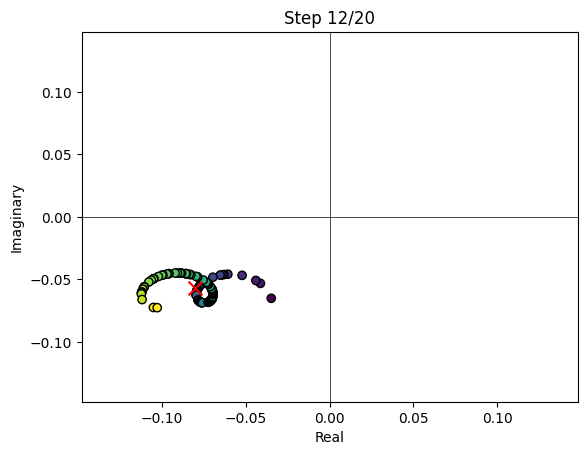

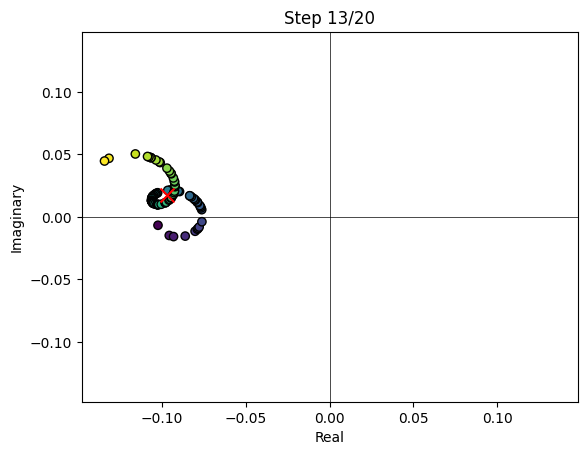

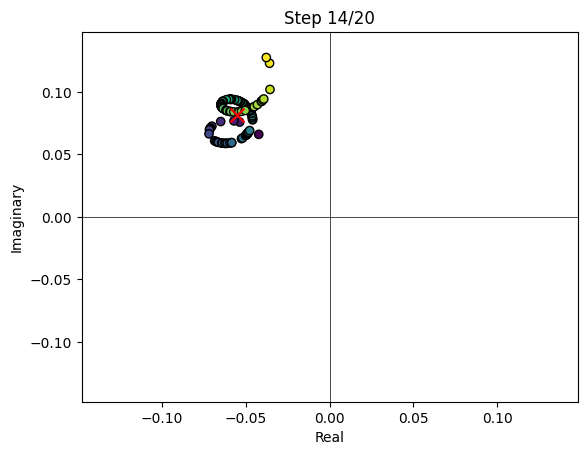

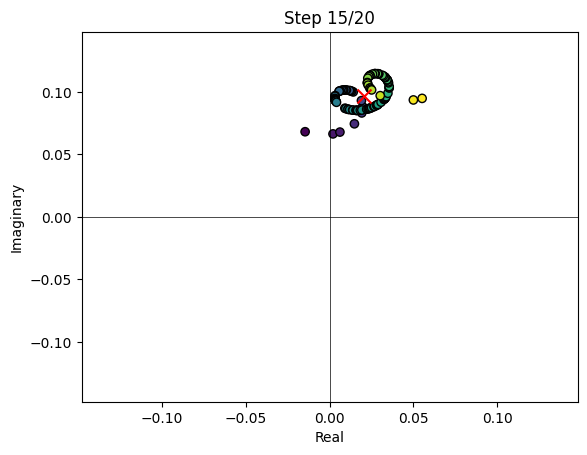

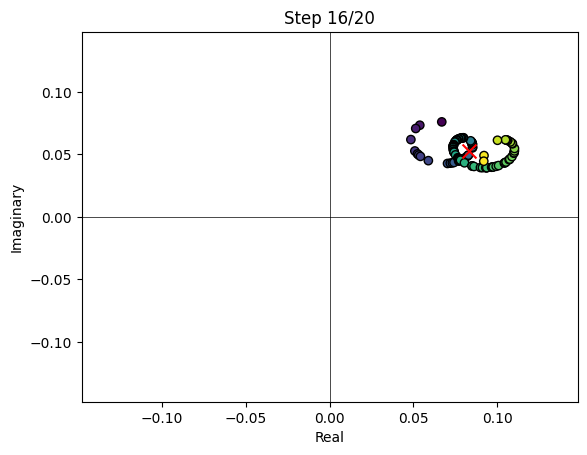

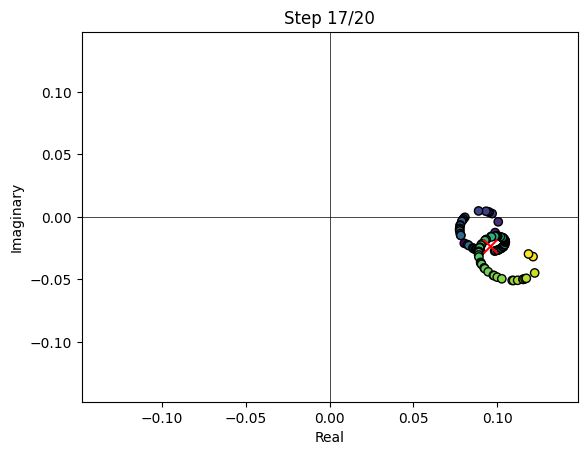

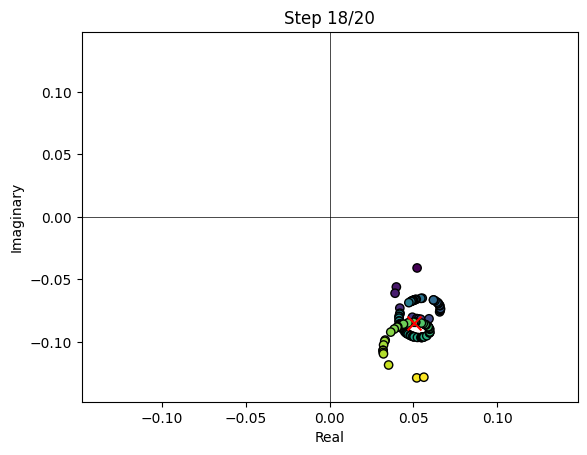

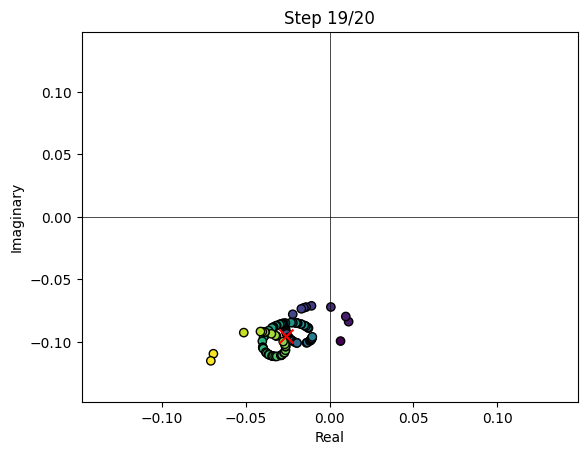

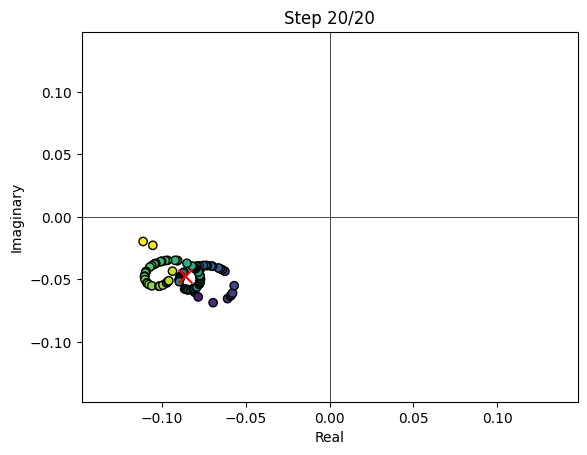

In [7]:
#############################################
####### UPDATED RECURSION ###################
#############################################


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import minimize

def simulate_complex_recursion(N, t1, t2, c, num_iterations):
    
    c = np.asarray(c) #cost function initialize

    # Initial states 1/sqrt(N)
    x = np.full(N, 1/np.sqrt(N), dtype=np.complex128)

  
    
    
    # Store iterations
    history = np.zeros((num_iterations, N), dtype=np.complex128)
    cost=np.zeros(num_iterations)
    mean_history = np.zeros(num_iterations, dtype=np.complex128)


    for n in range(num_iterations):
        exp_ib_pi2 = np.exp(-1j * (t2[n] *np.pi) / 2)
        sin_b2 = np.sin(t2[n]*np.pi / 2)
        history[n] = x  # Store current state
        mean_history[n] = np.mean(x) 
        # Compute the sum term
        sum_term = np.sum(x * np.exp(1j *np.pi* t1[n] * c)) / N
        
        # Update x_i for all i
        x = -1*x * np.exp(1j * t1[n]*np.pi * c) + 2 * exp_ib_pi2 * sin_b2 * sum_term
        cost[n]=np.dot(np.abs(x)**2,c)
    return history,mean_history,cost



def plot_evolution(history,mean_history,c):
    """
    Plots the evolution of the N complex variables on the complex plane.
    
    Parameters:
    history (ndarray): Array of shape (num_iterations, N) containing the evolution of x_i.
    """
    scale=np.max(np.abs(history))
    num_iterations, N = history.shape
    cmap = cm.viridis  # Use the viridis colormap for coloring points based on c values
    plt.figure(figsize=(8, 8))
    for n in range(num_iterations):
        plt.clf()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.scatter(history[n].real, history[n].imag, c=c, cmap=cmap, edgecolors='k')
        plt.scatter(mean_history[n].real, mean_history[n].imag, color='red', marker='x', s=100, label='Mean x')
        plt.xlim(-scale, scale)
        plt.ylim(-scale, scale)
        plt.xlabel('Real')
        plt.ylabel('Imaginary')
        plt.title(f'Step {n + 1}/{num_iterations}')
        plt.pause(0.1)  # Pause to visualize step-by-step
    plt.show()


N=100
c=np.sort(np.random.beta(10,10,N))
#c = np.array([0, 0.5, 1])
num_iterations=int(2*np.sqrt(N))
#num_iterations=10
a = np.ones(num_iterations)
b = np.ones(num_iterations)
a=a/2
b=b/2
history, mean_history, cost=simulate_complex_recursion(N, a, b, c, num_iterations)
plot_evolution(history, mean_history, c)

/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


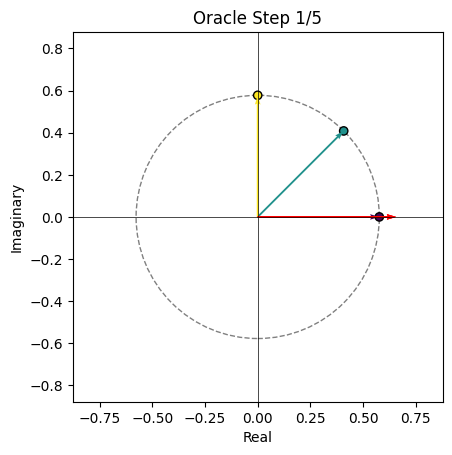

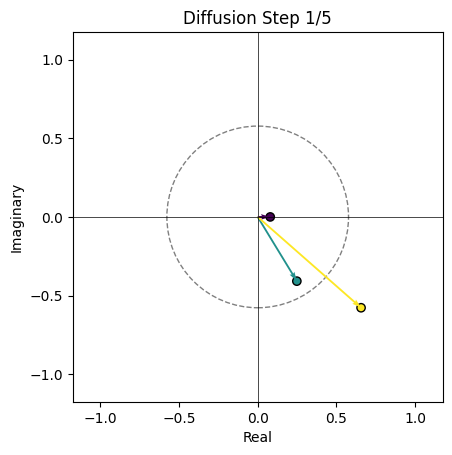

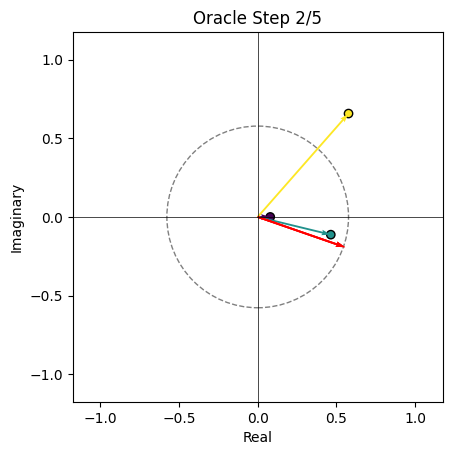

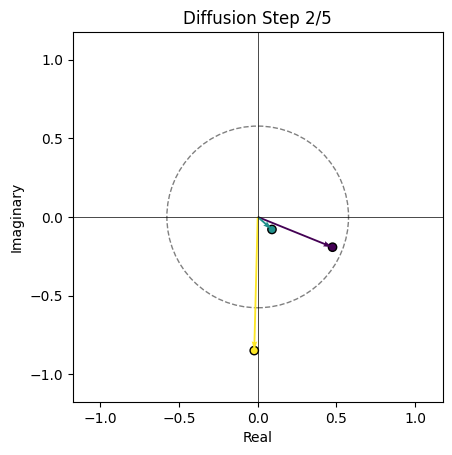

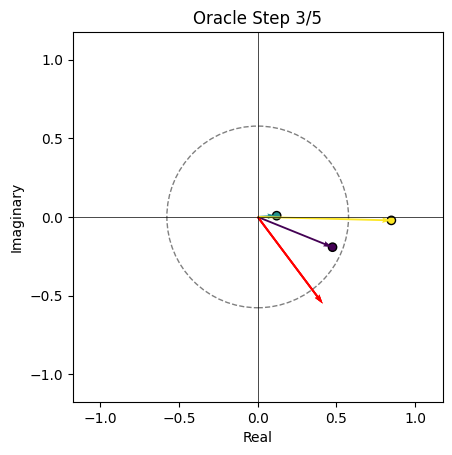

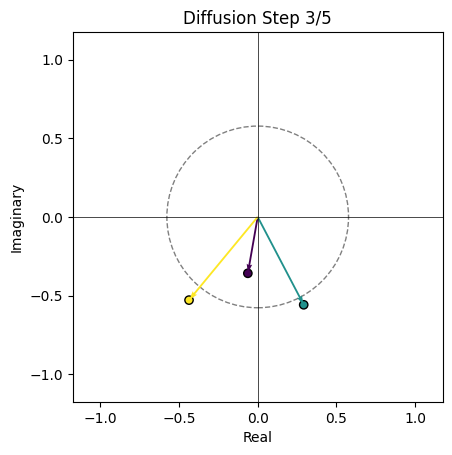

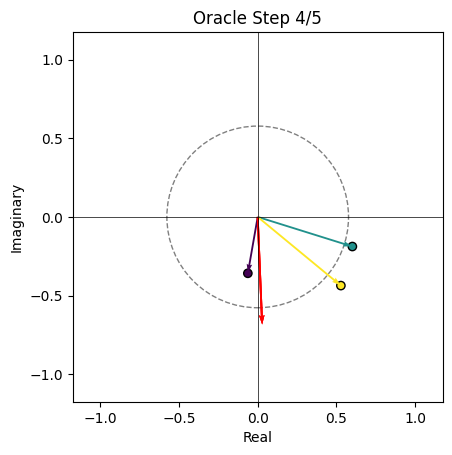

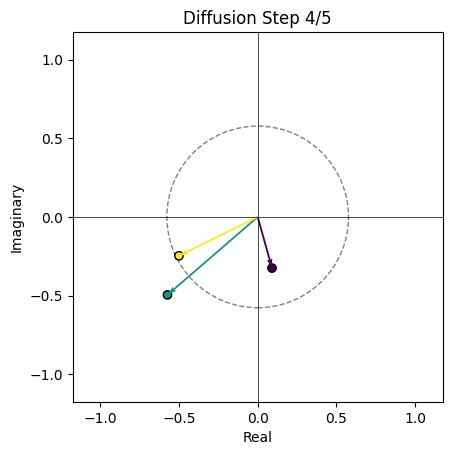

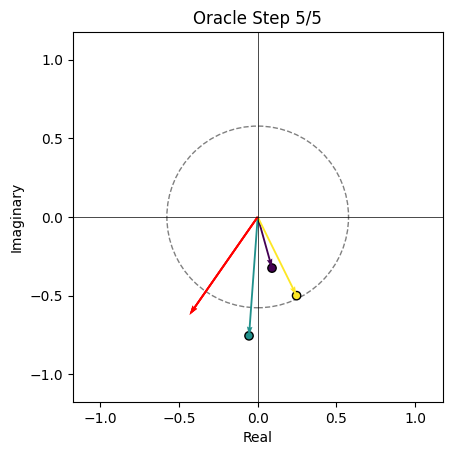

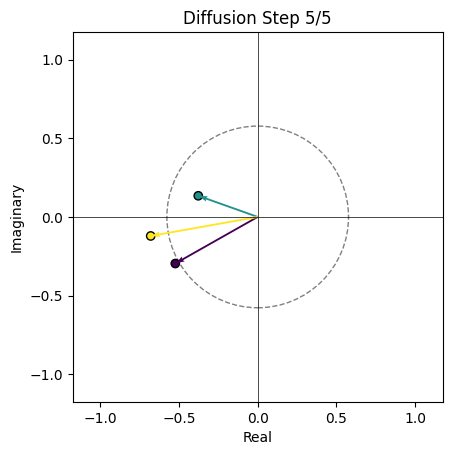

In [61]:
##########################################################
##### ORACLE AND DIFFUSION AS INDIVIDUAL STEPS ###########
##########################################################


import numpy as np
import matplotlib.pyplot as plt

def plot_effect(N, t1, t2, c, num_iter):
    c = np.asarray(c)  # cost function initialize

    # Initial state: 1/sqrt(N)
    x = np.full(N, 1/np.sqrt(N), dtype=np.complex128)
    oracle = np.diag(np.exp(1j * np.pi * c * t1))
    D2 = -1 * np.eye(N, dtype=np.complex64) - (np.exp(1j * np.pi * t2) - 1) * np.outer(x, x)
    state = x.copy()

    
    history = []
    mean_history = []

    radius = 1 / np.sqrt(len(state))

    oracle_step = 1  # Initialize oracle step counter
    diffusion_step = 1  # Initialize diffusion step counter

    for n in range(num_iter):
        prev_state = state.copy()
        if n % 2 == 0:
            state = oracle @ state
            step_title = f'Step {oracle_step}/{num_iter//2}'  
            oracle_step += 1
        else:
            state = D2 @ state
            step_title = f'Step {diffusion_step}/{num_iter//2}'
            diffusion_step += 1

        history.append(state)
        mean_history.append(np.mean(state))

        scale = np.max(np.abs(history)) + 0.3
        plt.clf()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        circle = plt.Circle((0, 0), radius, color='gray', linestyle='--', fill=False, linewidth=1)
        plt.gca().add_patch(circle)

        if n % 2 == 0:
            #oracle step
            # Compute (exp(i*pi*t2) - 1) * <x|psi> * |x>
            gamma_t2 = np.exp(1j * np.pi * t2) - 1
            inner_product = np.dot(np.conj(x), state)  
            vector = -gamma_t2 * inner_product * x 

            plt.scatter(np.real(state), np.imag(state), c=c, cmap='viridis', edgecolors='k')
            plt.quiver(np.zeros_like(state), np.zeros_like(state), np.real(state), np.imag(state), c, cmap='viridis', angles='xy', scale_units='xy', scale=1, width=0.005, edgecolor='k')
            plt.quiver(np.zeros_like(vector), np.zeros_like(vector),
                       np.real(vector), np.imag(vector),
                       angles='xy', scale_units='xy', scale=1, width=0.005, color='r', edgecolor='k')
            plt.xlim(-scale, scale)
            plt.ylim(-scale, scale)
            plt.xlabel('Real')
            plt.ylabel('Imaginary')
            plt.title(f'Oracle {step_title}')
            plt.gca().set_aspect('equal', adjustable='box')
            plt.pause(0.1)
        else:
            # Diffusion step
            plt.scatter(np.real(state), np.imag(state), c=c, cmap='viridis', edgecolors='k')
            plt.quiver(np.zeros_like(state), np.zeros_like(state),  np.real(state), np.imag(state),c, cmap='viridis', angles='xy', scale_units='xy', scale=1, width=0.005, edgecolor='k')
            plt.title(f'Diffusion {step_title}')
            plt.xlim(-scale, scale)
            plt.ylim(-scale, scale)
            plt.xlabel('Real')
            plt.ylabel('Imaginary')
            plt.gca().set_aspect('equal', adjustable='box')
            plt.pause(0.1)

N = 3
c = np.array([0, 0.5, 1])  # Cost function values
plot_effect(N, 0.5, 0.5, c, 10)


In [ ]:
####################################################
#### ANIMATION OF ORACLE AND DIFFUSION STEPS #######
####################################################


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def plot_effect_animation(N, t1, t2, c, num_iter, save_path="quantum_steps.gif"):
    c = np.asarray(c)
    x = np.full(N, 1 / np.sqrt(N), dtype=np.complex128)
    oracle = np.diag(np.exp(1j * np.pi * c * t1))
    D2 = -1 * np.eye(N, dtype=np.complex64) - (np.exp(1j * np.pi * t2) - 1) * np.outer(x, x)
    state = x.copy()

    radius = 1 / np.sqrt(N)
    gamma_t2 = np.exp(1j * np.pi * t2) - 1

    history = []
    for n in range(num_iter):
        if n % 2 == 0:
            state = oracle @ state
        else:
            state = D2 @ state
        history.append(state.copy())

    fig, ax = plt.subplots(figsize=(6, 6))

    def update(n):
        ax.clear()
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.add_patch(plt.Circle((0, 0), radius, color='gray', linestyle='--', fill=False, linewidth=1))

        state = history[n]
        scale = np.max(np.abs(history)) + 0.3

        ax.set_xlim(-scale, scale)
        ax.set_ylim(-scale, scale)
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ax.set_aspect('equal', adjustable='box')

        ax.scatter(np.real(state), np.imag(state), c=c, cmap='viridis', edgecolors='k')
        ax.quiver(np.zeros_like(state), np.zeros_like(state),
                  np.real(state), np.imag(state),
                  c, cmap='viridis', angles='xy', scale_units='xy', scale=1, width=0.005, edgecolor='k')

        if n % 2 == 0:
            step_num = n // 2 + 1
            ax.set_title(f'Oracle Step {step_num}/{num_iter // 2}')
            inner_product = np.dot(np.conj(x), state)
            vector = -gamma_t2 * inner_product * x
            ax.quiver(np.zeros_like(vector), np.zeros_like(vector),
                      np.real(vector), np.imag(vector),
                      angles='xy', scale_units='xy', scale=1, width=0.005, color='r', edgecolor='k')
        else:
            step_num = n // 2 + 1
            ax.set_title(f'Diffusion Step {step_num}/{num_iter // 2}')

    anim = FuncAnimation(fig, update, frames=num_iter, interval=500)

    # Save as GIF using PillowWriter
    writer = PillowWriter(fps=2)
    anim.save(save_path, writer=writer)
   





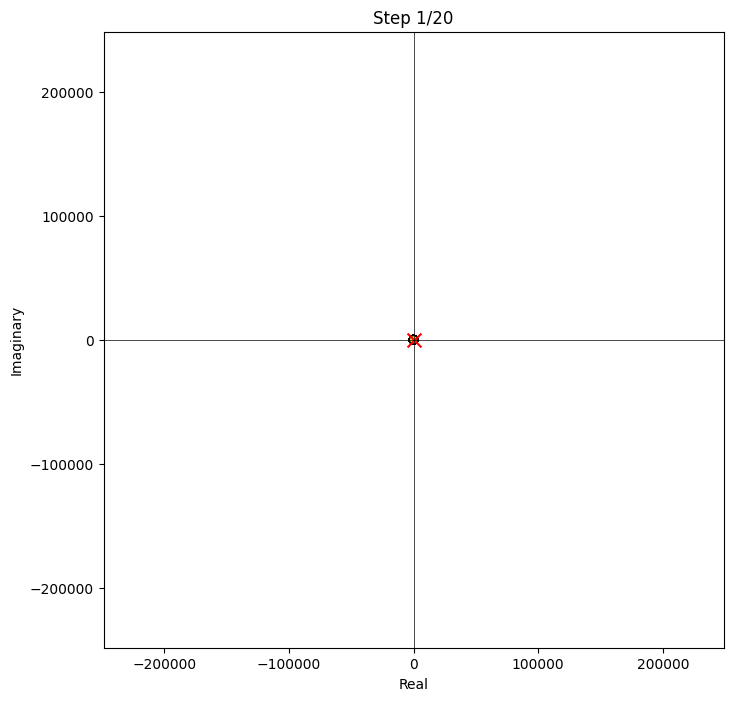

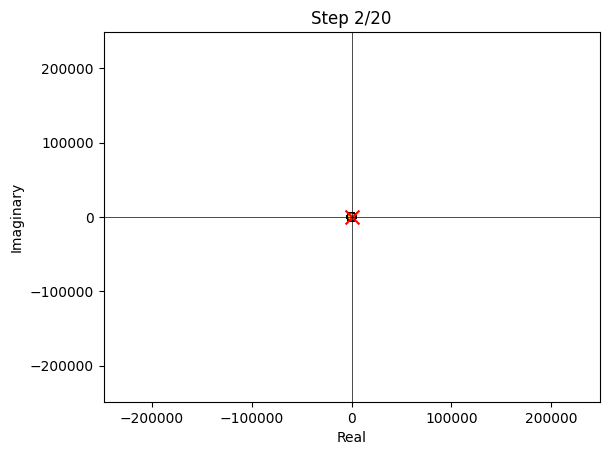

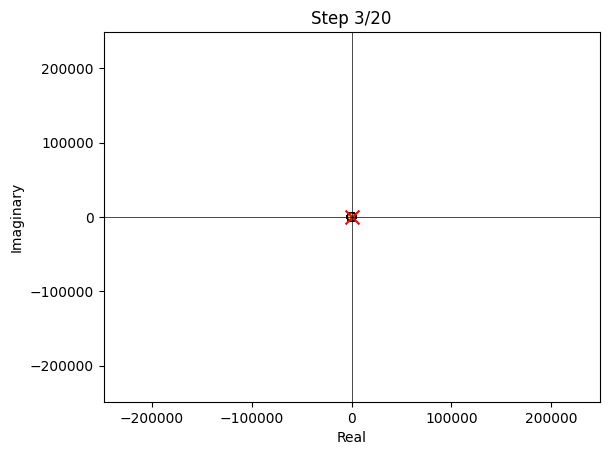

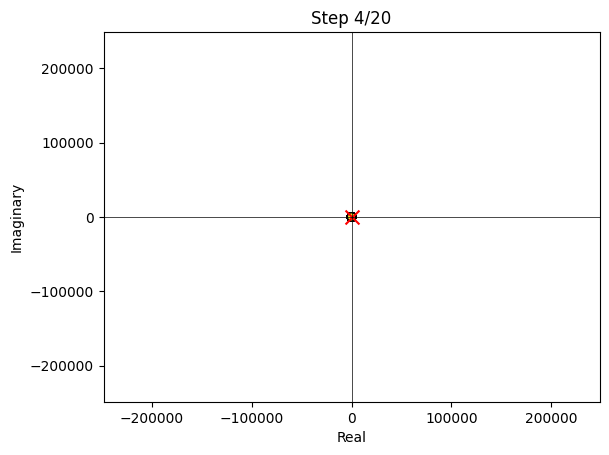

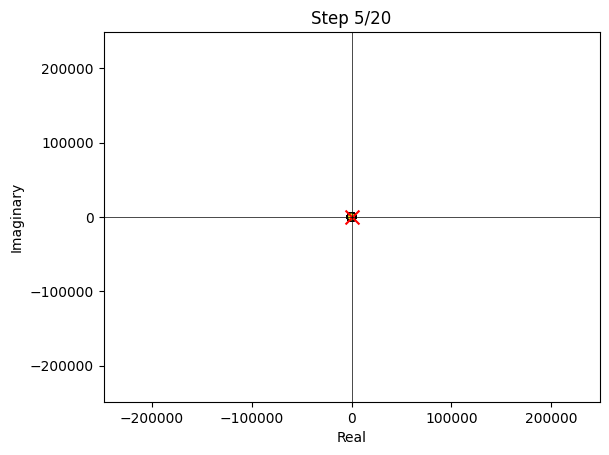

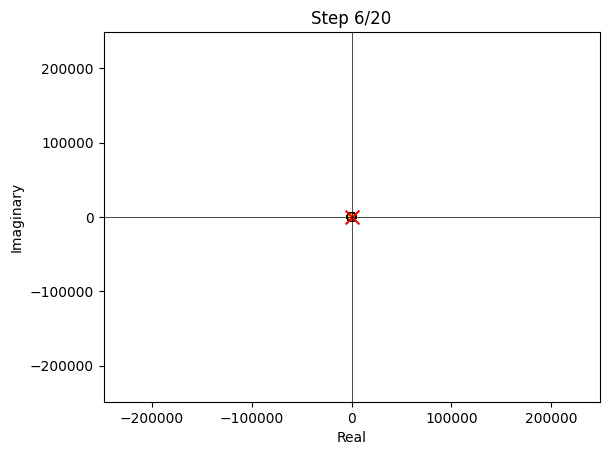

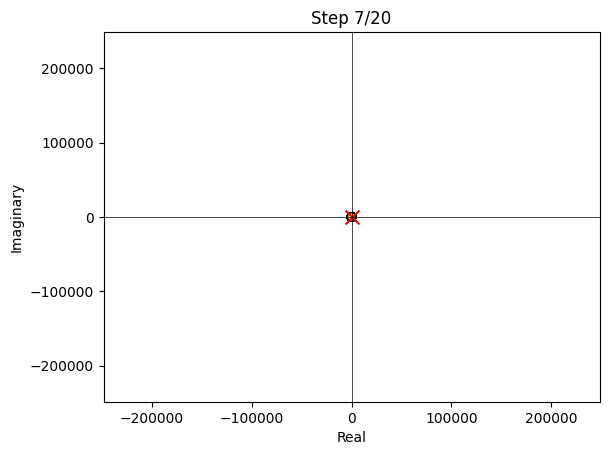

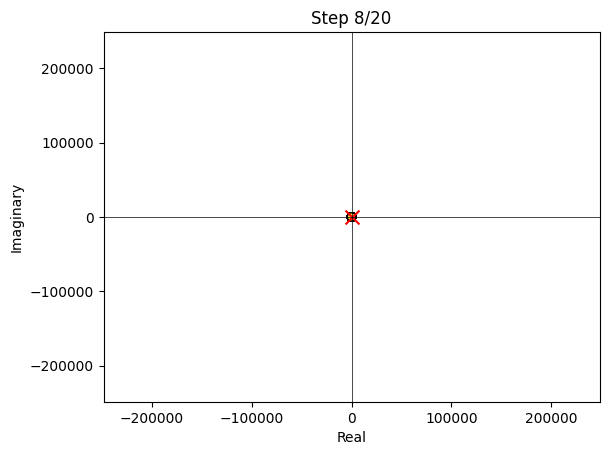

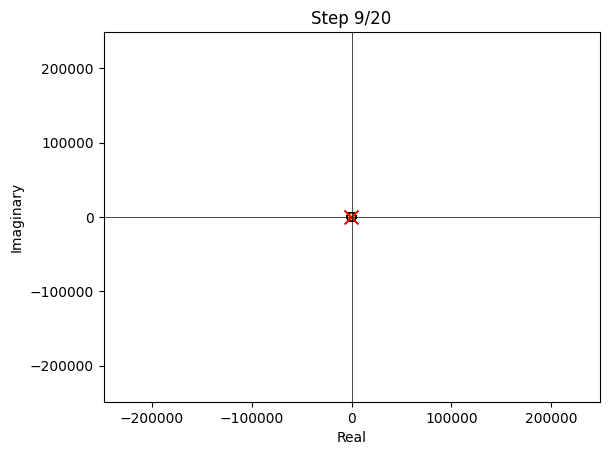

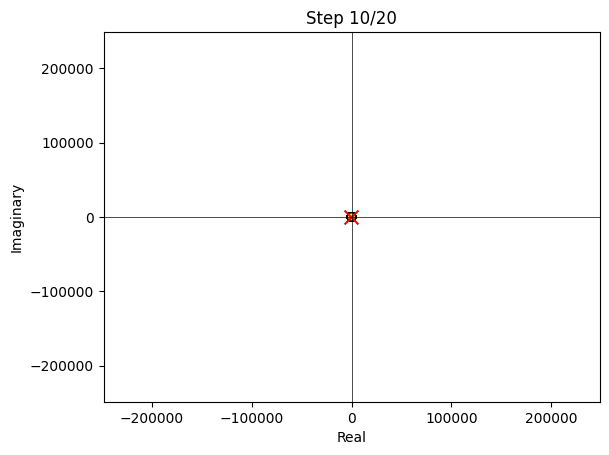

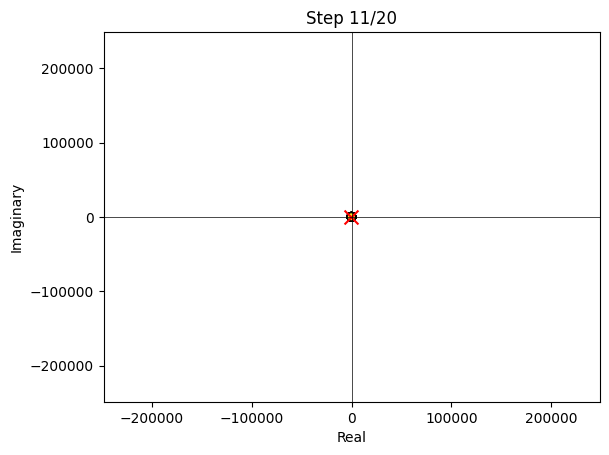

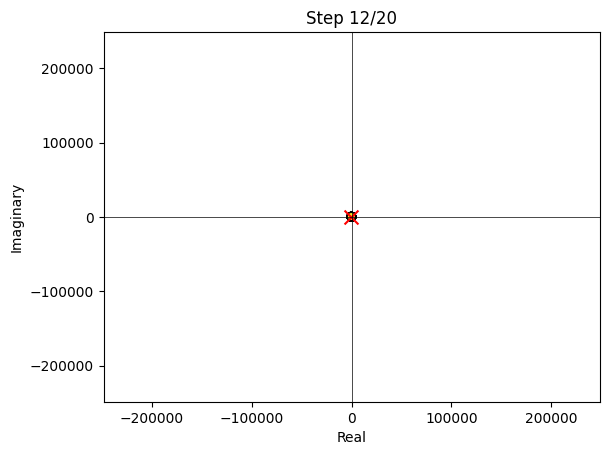

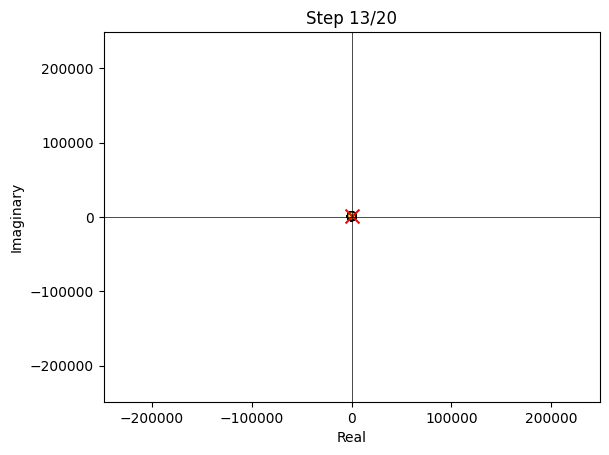

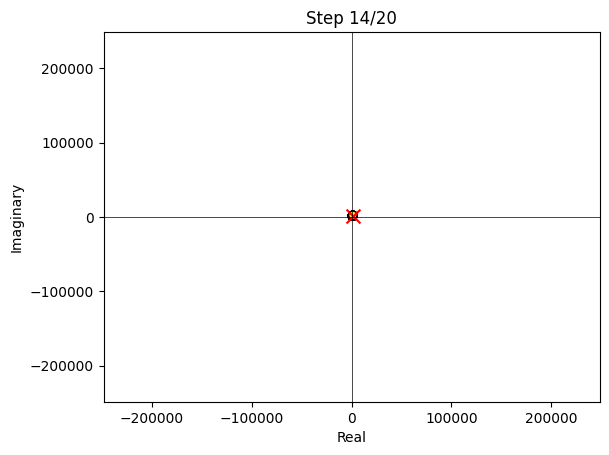

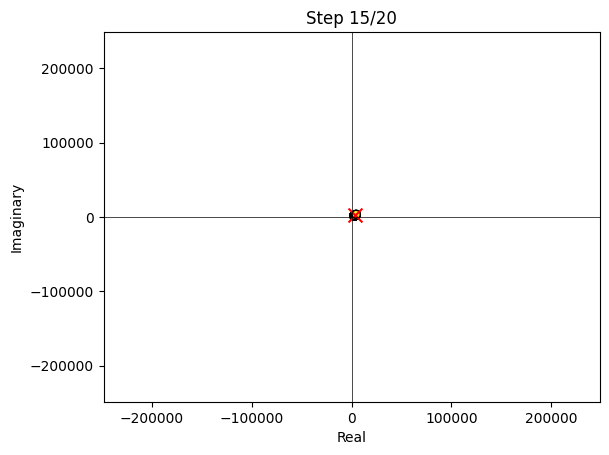

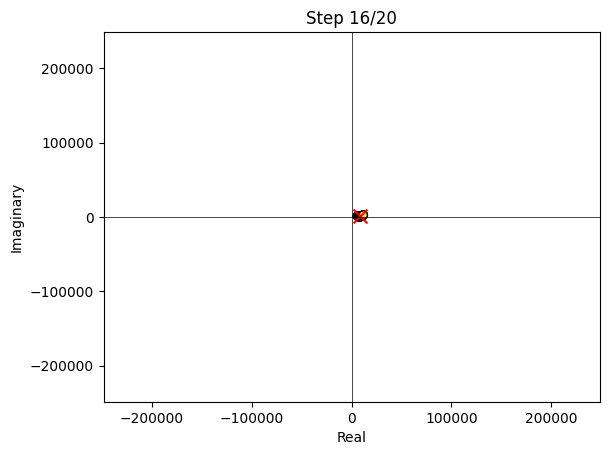

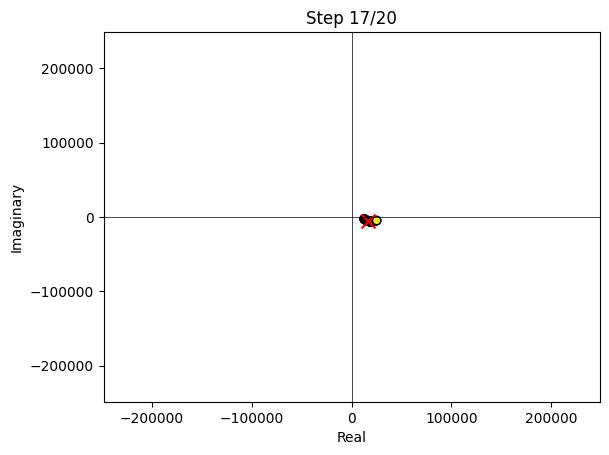

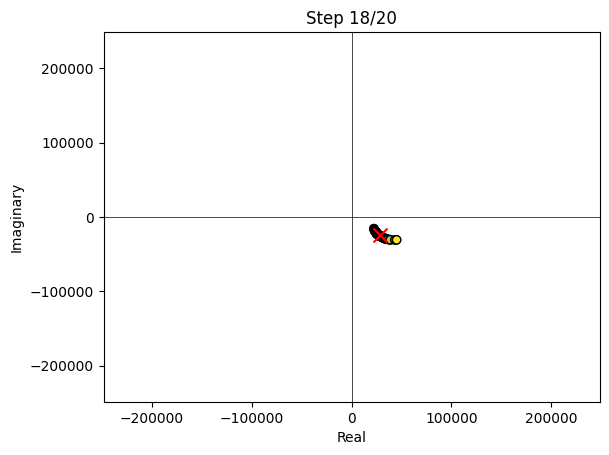

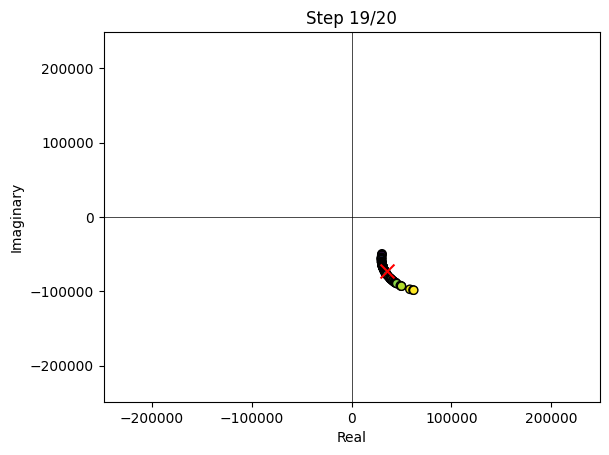

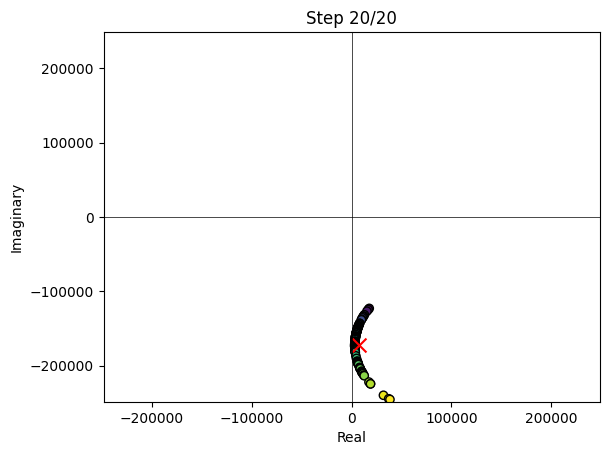

In [2]:
N=100
c=np.sort(np.random.beta(10,10,N))
#c = np.array([0, 0.5, 1])
num_iterations=int(2*np.sqrt(N))
#num_iterations=10
a = np.ones(num_iterations)
b = np.ones(num_iterations)
history, mean_history, cost=simulate_complex_recursion(N, a, b, c, num_iterations)
plot_evolution(history, mean_history, c)

In [ ]:
####################################################
#### ANIMATION OF ORACLE AND DIFFUSION STEPS #######
####################################################


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def plot_effect_animation(N, t1, t2, c, num_iter, save_path="quantum_steps.gif"):
    c = np.asarray(c)
    x = np.full(N, 1 / np.sqrt(N), dtype=np.complex128)
    oracle = np.diag(np.exp(1j * np.pi * c * t1))
    D2 = -1 * np.eye(N, dtype=np.complex64) - (np.exp(1j * np.pi * t2) - 1) * np.outer(x, x)
    state = x.copy()

    radius = 1 / np.sqrt(N)
    gamma_t2 = np.exp(1j * np.pi * t2) - 1

    history = []
    for n in range(num_iter):
        if n % 2 == 0:
            state = oracle @ state
        else:
            state = D2 @ state
        history.append(state.copy())

    fig, ax = plt.subplots(figsize=(6, 6))

    def update(n):
        ax.clear()
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.add_patch(plt.Circle((0, 0), radius, color='gray', linestyle='--', fill=False, linewidth=1))

        state = history[n]
        scale = np.max(np.abs(history)) + 0.3

        ax.set_xlim(-scale, scale)
        ax.set_ylim(-scale, scale)
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ax.set_aspect('equal', adjustable='box')

        ax.scatter(np.real(state), np.imag(state), c=c, cmap='viridis', edgecolors='k')
        ax.quiver(np.zeros_like(state), np.zeros_like(state),
                  np.real(state), np.imag(state),
                  c, cmap='viridis', angles='xy', scale_units='xy', scale=1, width=0.005, edgecolor='k')

        if n % 2 == 0:
            step_num = n // 2 + 1
            ax.set_title(f'Oracle Step {step_num}/{num_iter // 2}')
            inner_product = np.dot(np.conj(x), state)
            vector = -gamma_t2 * inner_product * x
            ax.quiver(np.zeros_like(vector), np.zeros_like(vector),
                      np.real(vector), np.imag(vector),
                      angles='xy', scale_units='xy', scale=1, width=0.005, color='r', edgecolor='k')
        else:
            step_num = n // 2 + 1
            ax.set_title(f'Diffusion Step {step_num}/{num_iter // 2}')

    anim = FuncAnimation(fig, update, frames=num_iter, interval=500)

    # Save as GIF using PillowWriter
    writer = PillowWriter(fps=2)
    anim.save(save_path, writer=writer)
   





In [74]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.use("Agg")  # or just don't use PGF at all

import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # use pdflatex or xelatex or lualatex
    "font.family": "serif",       # use serif/main font for text elements
    "text.usetex": True,          # use inline math for ticks
    "pgf.rcfonts": False,         # don't setup fonts from rc parameters
})
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False

def save_pgf_frames(N, t1, t2, c, num_iter, output_dir="pgf_frames1"):
    os.makedirs(output_dir, exist_ok=True)

    c = np.asarray(c)
    x = np.full(N, 1 / np.sqrt(N), dtype=np.complex128)
    oracle = np.diag(np.exp(1j * np.pi * c * t1))
    D2 = -1 * np.eye(N, dtype=np.complex64) - (np.exp(1j * np.pi * t2) - 1) * np.outer(x, x)
    state = x.copy()

    gamma_t2 = np.exp(1j * np.pi * t2) - 1
    radius = 1 / np.sqrt(N)

    history = []
    for n in range(num_iter):
        if n % 2 == 0:
            state = oracle @ state
        else:
            state = D2 @ state
        history.append(state.copy())

    for n, state in enumerate(history):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.add_patch(plt.Circle((0, 0), radius, color='gray', linestyle='--', fill=False, linewidth=1))

        scale = np.max(np.abs(history)) + 0.3
        ax.set_xlim(-scale, scale)
        ax.set_ylim(-scale, scale)
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ax.set_aspect('equal', adjustable='box')

        ax.scatter(np.real(state), np.imag(state), c=c, cmap='viridis', edgecolors='k')
        ax.quiver(np.zeros_like(state), np.zeros_like(state),
                  np.real(state), np.imag(state),
                  c, cmap='viridis', angles='xy', scale_units='xy', scale=1, width=0.005, edgecolor='k')

        if n % 2 == 0:
            step_num = n // 2 + 1
            ax.set_title(f'Oracle Step {step_num}/{num_iter // 2}')
            inner_product = np.dot(np.conj(x), state)
            vector = -gamma_t2 * inner_product * x
            ax.quiver(np.zeros_like(vector), np.zeros_like(vector),
                      np.real(vector), np.imag(vector),
                      angles='xy', scale_units='xy', scale=1, width=0.005, color='r', edgecolor='k')
        else:
            step_num = n // 2 + 1
            ax.set_title(f'Diffusion Step {step_num}/{num_iter // 2}')

        pgf_path = os.path.join(output_dir, f"frame_{n}.pgf")
        fig.savefig(pgf_path.replace(".pgf", ".pdf"))  # or .png


        plt.close(fig)

    print(f"✅ Saved {num_iter} PGF plots in '{output_dir}'")

# Usage
N = 3
c = np.array([0, 0.5, 1])
save_pgf_frames(N, 1, 1, c, 10)



/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casti

✅ Saved 10 PGF plots in 'pgf_frames1'


/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casti

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.use("Agg")  # or just don't use PGF at all
import matplotlib.colors as mcolors

plt.rcParams["text.usetex"] = False

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # use pdflatex or xelatex or lualatex
    "font.family": "serif",       # use serif/main font for text elements
    "text.usetex": False,          # use inline math for ticks
    "pgf.rcfonts": False,         # don't setup fonts from rc parameters
})

colors = ['#ADFF2F', '#00CED1', '#DDA0DD']  # GreenYellow, DarkTurquoise, Plum
n_bins = 3  # 3 distinct colors
cmap_name = 'custom_greenyellow_darkturquoise_plum_cmap'

# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def save_png_frames(N, t1, t2, c, num_iter, output_dir="png_frames_t05"):
    os.makedirs(output_dir, exist_ok=True)

    c = np.asarray(c)
    x = np.full(N, 1 / np.sqrt(N), dtype=np.complex128)
    oracle = np.diag(np.exp(1j * np.pi * c * t1))
    D2 = -1 * np.eye(N, dtype=np.complex64) - (np.exp(1j * np.pi * t2) - 1) * np.outer(x, x)
    state = x.copy()

    gamma_t2 = np.exp(1j * np.pi * t2) - 1
    radius = 1 / np.sqrt(N)

    history = []
    for n in range(num_iter):
        if n % 2 == 0:
            state = oracle @ state
        else:
            state = D2 @ state
        history.append(state.copy())

    for n, state in enumerate(history):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.add_patch(plt.Circle((0, 0), radius, color='gray', linestyle='--', fill=False, linewidth=1))

        scale = np.max(np.abs(history)) + 0.14
        ax.set_xlim(-scale, scale)
        ax.set_ylim(-scale, scale)
        ax.set_xlabel('Real Axis')
        ax.set_ylabel('Imaginary Axis')
        ax.set_aspect('equal', adjustable='box')

        ax.scatter(np.real(state), np.imag(state), c=c, cmap=cmap, edgecolors='k')
        
        # Increase vector width by changing the width parameter
        ax.quiver(np.zeros_like(state), np.zeros_like(state),
                  np.real(state), np.imag(state),
                  c, cmap=cmap, angles='xy', scale_units='xy', scale=1, width=0.015, edgecolor='k', linewidth=1.5)

        if n % 2 == 0:
            step_num = n // 2 + 1
            ax.set_title(f'Oracle Operator Step {step_num}')
            inner_product = np.dot(np.conj(x), state)
            vector = -gamma_t2 * inner_product * x
            ax.quiver(np.zeros_like(vector), np.zeros_like(vector),
                      np.real(vector), np.imag(vector),
                      angles='xy', scale_units='xy', scale=1, width=0.01, color='r', edgecolor='k')
        else:
            step_num = n // 2 + 1
            ax.set_title(f'Diffusion Operator Step {step_num}')

        # Save as PNG
        png_path = os.path.join(output_dir, f"frame_{n}.png")
        fig.savefig(png_path, dpi=300)  # Save as PNG with high resolution (300 dpi)

        plt.close(fig)

    print(f"✅ Saved {num_iter} PNG plots in '{output_dir}'")

# Usage
N = 3
c = np.array([0, 0.5, 1])
save_png_frames(N, 0.5, 0.5, c, 10)


/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/ylvaschuch/Desktop/QRWThesis/QRW_Master/QRW/lib/python3.12/site-packages/matplotlib/transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


✅ Saved 10 PNG plots in 'png_frames_t05'
